In [3]:
using RandomNumbers
using DataFrames

In [5]:
@inline @fastmath function randbn(n,p,rng)
    q = 1.0 - p
    s = p/q
    a = (n+1)*s
    r = exp(n*log(q))
    x = 0
    u = rand(rng)
    while true
        if (u < r)
            return x
        end
        u -= r
        x += 1
        r *= (a/x)-s
    end
end

randbn (generic function with 1 method)

In [6]:
@inline @fastmath function sir(u, prams, rng)
     
    (S, I, R, Y) = u
    (β, γ, ι, N, δt) = prams
    λ = β * (I + ι) / N
    ifrac = 1.0 - exp(-λ * δt)
    rfrac = 1.0 - exp(-γ * δt)
    infection = randbn(S, ifrac, rng)
    recovery = randbn(I, rfrac, rng)
    return (S - infection, I + infection - recovery, R + recovery, Y + infection)
end

sir (generic function with 1 method)

In [7]:
function simulate(r)
    prams = (0.1, 0.05, 0.01, 1000.0, 0.1)
    tf = 200
    t = 0:0.1:tf
    tl = length(t)
    S = zeros(tl)
    I = zeros(tl)
    R = zeros(tl)
    Y = zeros(tl)
    u0 = (999, 1, 0, 0)
    (S[1],I[1],R[1],Y[1]) = u0
    u = u0
    for i in 2:tl
        u = sir(u, prams, r)
        (S[i],I[i],R[i],Y[i]) = u
    end
    return DataFrame(Time=t,S=S,I=I,R=R,Y=Y)
end

simulate (generic function with 1 method)

In [8]:
seed = 42
r = Xorshifts.Xorshift128Plus(seed);

In [9]:
sir_out = simulate(r);

In [10]:
if(size(sir_out)[1] >= 6)
    first(sir_out,6)
else
    first(sir_out,size(sir_out)[1]) 
end

,Time,S,I,R,Y
,Float64,Float64,Float64,Float64,Float64
1,0.0,999.0,1.0,0.0,0.0
2,0.1,999.0,1.0,0.0,0.0
3,0.2,999.0,1.0,0.0,0.0
4,0.3,999.0,1.0,0.0,0.0
5,0.4,999.0,1.0,0.0,0.0
6,0.5,999.0,1.0,0.0,0.0


In [13]:
using Plots
using StatPlots

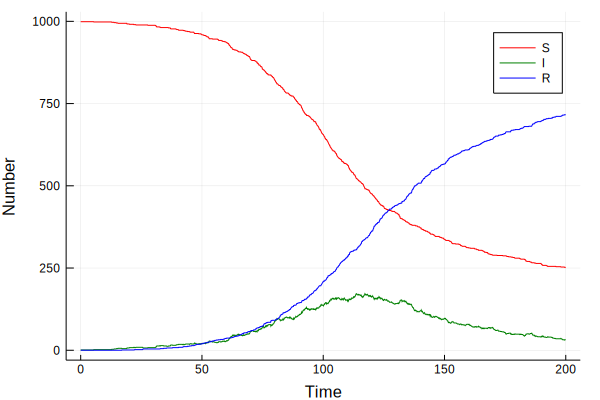

In [14]:
@df sir_out plot(:Time, [:S :I :R], colour = [:red :green :blue], xlabel="Time",ylabel="Number")